In [16]:
import numpy as np
from matplotlib import pyplot as plt
import math
plt.rcParams["figure.figsize"] = (16,9)

In [2]:
V=1e6
V

1000000.0

## Generator

In [3]:
def get_next(prev, a, m):
    return a * prev % m
    
def generate(a,m,R0,n=V):
    numbers = []
    for i in range(int(n)):
        prev = R0 if i == 0 else R
        R = get_next(prev,a,m)
        numbers.append(R / m)
    return np.array(numbers)

## Period 

In [4]:
def get_period(numbers):
    value = numbers[-1]
    indexes = np.where(numbers == value)[0] 
    return indexes[1] - indexes[0]
def get_aperiod(numbers, p):
    l = 0
    i = 0
    while numbers[i] != numbers[i+p]:
        i += 1 
    l = i + p
    return l 

## Grid search to find parameters

In [5]:
def grid_search(a, m, r):
    max_period = 0
    best_params = {}
    aperiod_params = {}
    for a_val in a:
        for m_val in m:
            for r_val in r:
                numbers = generate(a_val,m_val,r_val)
                period = get_period(numbers)         
                ap = get_aperiod(numbers, period)
                print(f"a: {a_val} m: {m_val} R0: {r_val}. Period: {period}")
                if ap != period:
                    aperiod_params = {'a': a_val,'m': m_val,'R0': r_val}                    
                if period > max_period:
                    max_period = period
                    best_params = {'a': a_val,'m': m_val,'R0': r_val}
                
    return best_params, max_period, aperiod_params
                

In [6]:
a = range(30000, 30010)
m = range(50000,50010)
r = [28657, 33461, 43261]
# grid_search(a,m,r)

In [31]:
a = 1664525
m = 2**18
R0 = 514229

In [32]:
# a = 30009
# m = 50004
# R0 = 43261

In [33]:
numbers = generate(a,m, R0)

In [34]:
p = get_period(numbers)
p

10

In [35]:
get_aperiod(numbers, p)

10

In [36]:
numbers.mean()

0.4999999999999995

In [37]:
numbers.var()

0.12474747474747457

In [38]:
numbers.std()

0.35319608540791414

Text(0, 0.5, 'Probability')

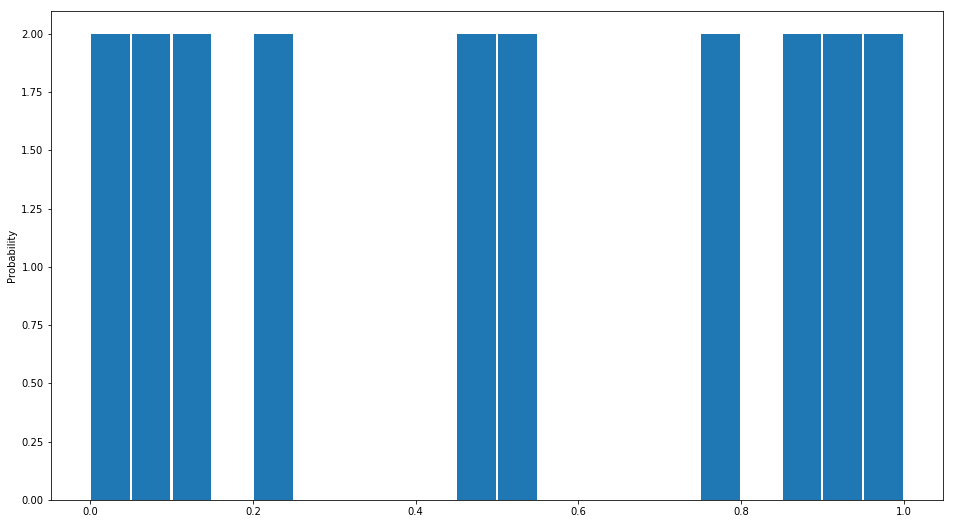

In [39]:
plt.hist(numbers, bins=20, density=True, rwidth=0.95, range=(0,1))
plt.ylabel('Probability')

## Uniform check

In [18]:
def check_uniform(numbers):
    k = 0
    for i in range(0, len(numbers), 2):
        if numbers[i]**2 + numbers[i+1]**2 < 1:
            k += 1
    print(f"k = {k}")
    return 2 * k / len(numbers)

In [19]:
print(f"2K/N = {check_uniform(numbers)}")

k = 392680
2K/N = 0.78536


In [20]:
print(f"Pi/4 = {math.pi / 4}")

Pi/4 = 0.7853981633974483
